In [ ]:
%load_ext autoreload
%autoreload 2

# Load data

In [1]:
import numpy as np
import pandas as pd
import torch

from ChemSelML.bin.ChemSelectivityDataset import ReactionDataset, SelectivityDataset

ArR_dataset = ReactionDataset(root='/PyScripts/PyTorch.dir/Radical/DataSet', mode='dev')
print(ArR_dataset,'\n')
print(ArR_dataset.data,'\n')

ArR_DDG_dataset = SelectivityDataset(root='/PyScripts/PyTorch.dir/Radical/DataSet', mode='dev')
print(ArR_DDG_dataset,'\n')
print(ArR_DDG_dataset.data,'\n')

ReactionDataset(3605) 

Data(ArR_idx=[3605], Ar_ACSF=[41477, 23], Ar_ACSF_local=[3605, 16], Ar_BoB=[3605, 291], Ar_CM=[79310, 22], Ar_MACCSfp=[3605, 167], Ar_Morganfp=[3605, 512], Ar_PhyChem_local=[3605, 13], Ar_PhyChem_total=[3605, 10], Ar_SOAP=[3605, 5292], Ar_edge_attr=[451446, 11], Ar_edge_index=[2, 451446], Ar_mergefp=[3605, 679], Ar_pos=[41477, 3], Ar_x=[41477, 38], R_ACSF=[28015, 23], R_ACSF_local=[3605, 16], R_BoB=[3605, 122], R_CM=[79310, 22], R_MACCSfp=[3605, 167], R_Morganfp=[3605, 512], R_PhyChem_local=[3605, 9], R_PhyChem_total=[3605, 5], R_SOAP=[3605, 5292], R_edge_attr=[223276, 11], R_edge_index=[2, 223276], R_mergefp=[3605, 679], R_pos=[28015, 3], R_x=[28015, 38], y=[3605]) 

SelectivityDataset(5306) 

Data(ArR_sel_idx=[5306], Ar_ACSF=[62492, 23], Ar_ACSF_local@A=[5306, 16], Ar_ACSF_local@B=[5306, 16], Ar_BoB=[5306, 291], Ar_CM=[116732, 22], Ar_MACCSfp=[5306, 167], Ar_Morganfp=[5306, 512], Ar_PhyChem_local@A=[5306, 13], Ar_PhyChem_local@B=[5306, 13], Ar_PhyChem_total=[5

# Final Model Training

In [2]:
import importlib, sys 
#importlib.reload(sys.modules['ChemSelML.train.ChemSelPredictor'])
#importlib.reload(sys.modules['ChemSelML.train.utils'])
from ChemSelML.train.ChemSelPredictor import ChemSel_Predictor
from ChemSelML.train.utils import plot_learning_curve
from ChemSelML.learners.Regressor import get_regressor_lib


/home/user/miniconda/envs/py36/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [3]:
model = get_regressor_lib('RF_R')
predictor = ChemSel_Predictor(ArR_DDG_dataset.data, model=model, 
                               features=['PhyChem_total','PhyChem_local'], mode='DDG_R', n_jobs=14,
                               processed_dir=ArR_DDG_dataset.processed_dir, 
                               suffix='PhyChem@RF_Reg', reloadTimestamp=None)

X.shape:  (5306, 50)
20200117_190028
Cross Validation:
    ** R2  : 0.9632
    ** MAE  : 0.5063
    ** MSE  : 0.5058
Please input self.RFECV_Train() to start training model and get self.selector


In [4]:
predictor.RFECV_Train()


/PyScripts/PyTorch.dir/Radical/DataSet/processed/models_pkg/FinalModel_PhyChem@RF_Reg_20200117_190028.pkl


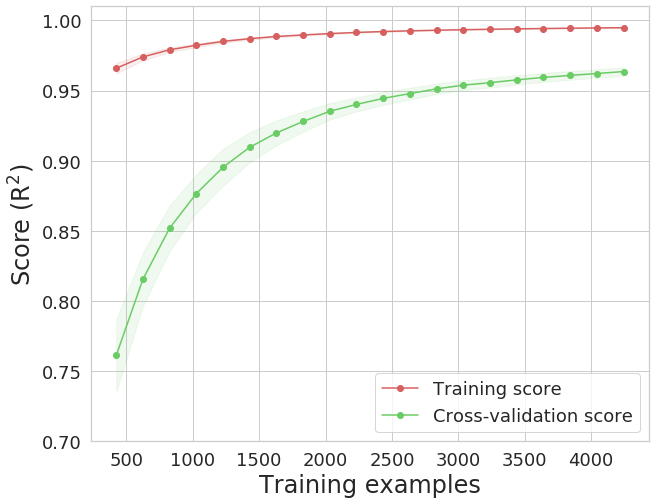

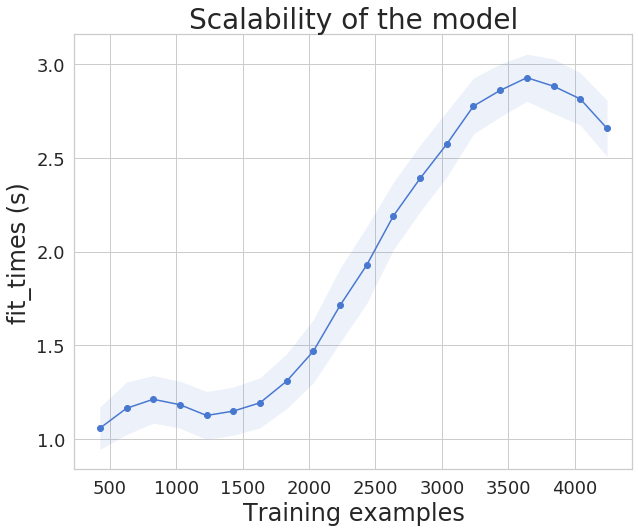

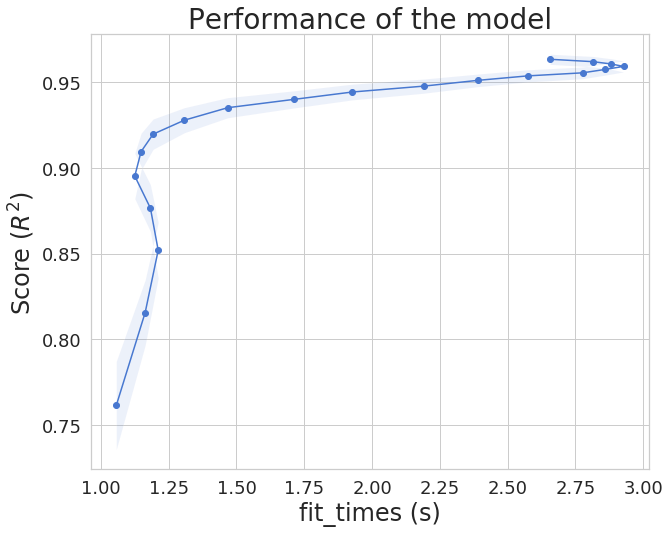

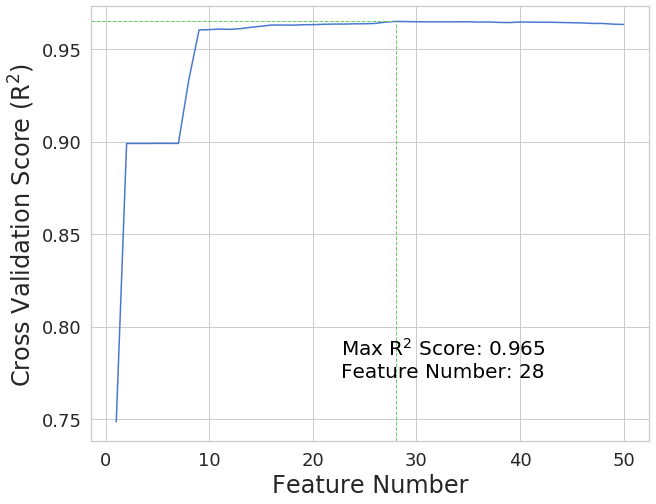

Feature number:  28
Max_R2_Score:  0.9649132619823174


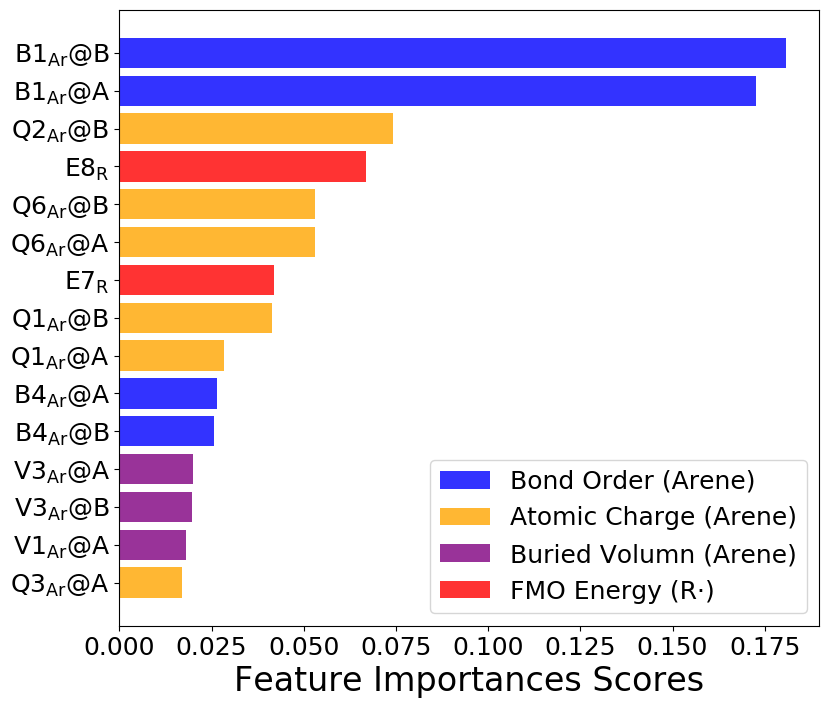

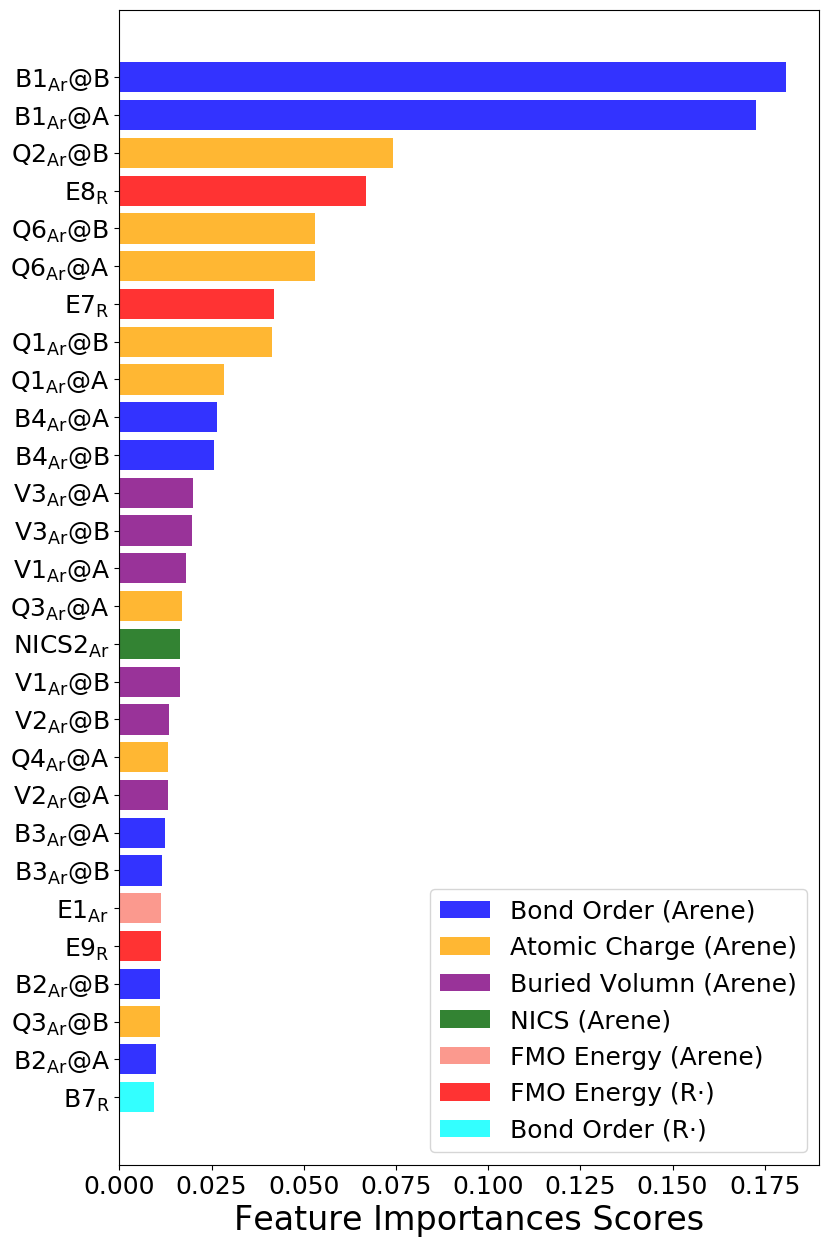

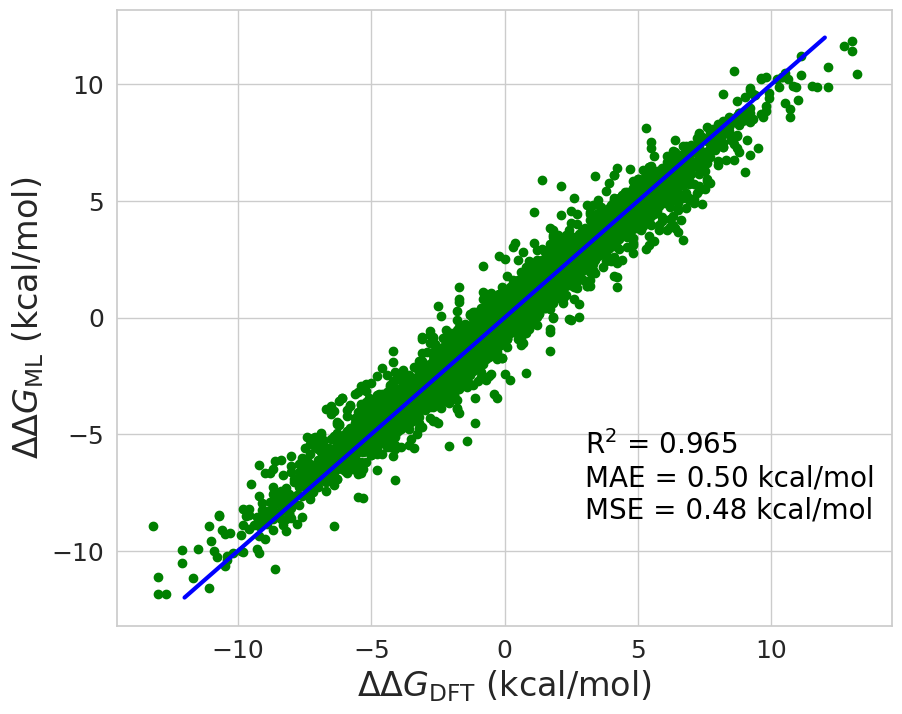

site_acc:  0.9421
degree_acc:  0.8991


In [5]:
predictor.get_training_result(notitle=True)

In [7]:
predictor.pred_df.sort_values(by=['Ar', 'R', 'loc1', 'loc2'])

,Ar,R,loc1,loc2,y_true,y_pred
idx,,,,,,
6112101.0,121,61,0,1,5.6,6.003
16112110.0,121,61,1,0,-5.6,-6.062
6212101.0,121,62,0,1,4.9,5.198
16212110.0,121,62,1,0,-4.9,-5.240
6312101.0,121,63,0,1,3.9,4.032
16312110.0,121,63,1,0,-3.9,-4.300
6412101.0,121,64,0,1,4.8,4.952
16412110.0,121,64,1,0,-4.8,-5.317
6512101.0,121,65,0,1,6.1,5.427


In [480]:
df = predictor.ArR_df_sel
print(df.shape)
df[((df['site_error'] == 0) & (df['degree_error'] == 0)) | \
        ((df['degree_true'] == 0) & (df['degree_pred'] == 0))
        ]['degree_error'].value_counts()[0]

(1398, 8)


1265

In [481]:
df['site_error'].value_counts()[0]

1307

In [484]:
df

,Ar,R,sel@loc_true,degree_true,sel@loc_pred,degree_pred,site_error,degree_error
0,121,61,1,1,1,1,0,0
1,122,61,0,0,0,1,0,1
2,123,61,1,0,2,0,1,0
3,124,61,0,0,0,0,0,0
4,125,61,1,1,1,1,0,0
5,131,61,1,1,1,1,0,0
6,132,61,0,1,0,1,0,0
7,133,61,1,1,1,1,0,0
8,134,61,3,1,3,1,0,0
9,135,61,3,0,3,0,0,0


In [483]:
df.groupby(by=['Ar', 'R'])['sel@loc_true'].mean().unstack()

R,61,62,63,64,65,66,67,68,69,70,71,72,73
Ar,,,,,,,,,,,,,
121,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
122,0.0,2.0,0.0,2.0,1.0,0.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0
123,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,2.0,2.0
124,0.0,0.0,0.0,1.0,3.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
125,1.0,1.0,3.0,3.0,3.0,1.0,0.0,0.0,3.0,3.0,0.0,3.0,0.0
131,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
132,0.0,1.0,0.0,0.0,1.0,2.0,1.0,2.0,2.0,0.0,2.0,2.0,1.0
133,1.0,1.0,1.0,1.0,2.0,0.0,2.0,0.0,2.0,2.0,0.0,2.0,2.0
134,3.0,0.0,0.0,1.0,1.0,0.0,3.0,3.0,0.0,0.0,3.0,3.0,0.0


In [485]:
predictor.pred_df.shape

(5306, 6)

In [ ]:
predictor.save_to_pkl(predictor)

In [ ]:
predictor = predictor.load_from_pkl('Predictor')

# Benchmark

In [117]:
from ChemSelML.train.training import FSet
from ChemSelML.train.benchmark import Benchmark
import warnings

In [75]:
#model_names = ['XGB_R', 'RF_R']
#feat_alias = ['Fa', 'Ba', 'Pp', 'a', 'p']
model_names = []
feat_alias = ['Fs', 'Fa', 'Bs', 'Ba', 'Pp', 's', 'a', 'p']

In [76]:
BMK = Benchmark(mode='DDG_R', model_names=model_names, feat_alias=feat_alias, 
                n_jobs=14, feat_parallel=True, model_parallel=True)

In [77]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    model_res, y_pred_history, FSet, cv_result_history = BMK.CV_fit(ArR_DDG_dataset.data) 
    

1 2020.01.02 06:58:55 ('ACSF_local',) complete!
    Time cost: 6240.0798s
8 2020.01.02 07:04:36 ('mergefp', 'ACSF_local') complete!
    Time cost: 6581.0317s
2 2020.01.02 07:07:16 ('PhyChem_local',) complete!
    Time cost: 6741.9121s
23 2020.01.02 07:07:20 ('PhyChem_total', 'PhyChem_local') complete!
    Time cost: 6745.3156s
15 2020.01.02 07:12:16 ('BoB', 'ACSF_local') complete!
    Time cost: 7041.4107s
0 2020.01.02 07:43:39 ('SOAP',) complete!
    Time cost: 8924.6605s
14 2020.01.02 07:44:34 ('BoB', 'SOAP') complete!
    Time cost: 8979.1387s
7 2020.01.02 07:44:59 ('mergefp', 'SOAP') complete!
    Time cost: 9004.9669s


In [118]:
BMK.processed_dir = ArR_DDG_dataset.processed_dir
BMK.suffix = 'reg_DDG'
BMK.save_to_pkl(y_pred_history, filename='y_pred_history')
BMK.save_to_pkl(FSet, filename='FSet')
BMK.save_to_pkl(cv_result_history, filename='cv_result_history')


/PyScripts/PyTorch.dir/Radical/DataSet/processed/Benchmark_pkl/y_pred_history_reg_DDG_20200102_051446.pkl
/PyScripts/PyTorch.dir/Radical/DataSet/processed/Benchmark_pkl/FSet_reg_DDG_20200102_051446.pkl
/PyScripts/PyTorch.dir/Radical/DataSet/processed/Benchmark_pkl/cv_result_history_reg_DDG_20200102_051446.pkl


In [ ]:
BMK.save_to_pkl(BMK, filename='BMK')

In [78]:
model_res

{700: [7, 'Fs', 'XGB_R', 0.4913, 0.4444, 0.9677, 0.8304, 0.9109],
 701: [7, 'Fs', 'RF_R', 0.5051, 0.5002, 0.9636, 0.8285, 0.9052],
 702: [7, 'Fs', 'Ada_R', 1.3111, 2.7545, 0.7996, 0.6202, 0.7552],
 703: [7, 'Fs', 'GB_R', 0.7327, 0.9539, 0.9306, 0.7714, 0.8771],
 704: [7, 'Fs', 'DTree_R', 0.7041, 1.0066, 0.9268, 0.777, 0.8743],
 705: [7, 'Fs', 'LR_R', 0.8479, 1.352, 0.9016, 0.7667, 0.8745],
 706: [7, 'Fs', 'Lasso_R', 1.8533, 5.5863, 0.5936, 0.4883, 0.6621],
 707: [7, 'Fs', 'Ridge_R', 0.9525, 1.6409, 0.8806, 0.7361, 0.8609],
 708: [7, 'Fs', 'BRR_R', 0.89, 1.4678, 0.8932, 0.7542, 0.8749],
 709: [7, 'Fs', 'KRR_R', 1.2055, 2.4076, 0.8249, 0.6557, 0.8076],
 710: [7, 'Fs', 'SVR_R', 2.0469, 7.1855, 0.4773, 0.4103, 0.5944],
 711: [7, 'Fs', 'LSVR_R', 1.2249, 2.5509, 0.8144, 0.65, 0.7895],
 712: [7,
  'Fs',
  'SGD_R',
  55919148736967.84,
  5.815132339013013e+27,
  -4.2303317691433314e+26,
  0.2002,
  0.2002],
 713: [7, 'Fs', 'KNR_R', 2.2717, 8.7323, 0.3647, 0.3835, 0.543],
 714: [7, 'Fs', 'GPR_R

In [271]:
import pandas as pd
import time

Timestamp = time.strftime('%Y%m%d_%H%M%S', time.localtime(time.time()))

column = ['Feat_idx', 'Feat_alias', 'Model', 'MAE', 'MSE', 'R2', 'F1_micro_5c', 'F1_micro_3c']
reg_res_df = pd.DataFrame.from_dict(model_res,orient='index',columns=column).sort_values(by=['R2'],ascending=False)
#reg_res_df.to_csv(r'%s/ArR_DDG_reg_result_xgb_%s.csv'%(ArR_DDG_dataset.processed_dir,Timestamp))
reg_res_df[reg_res_df['R2']>0]

,Feat_idx,Feat_alias,Model,MAE,MSE,R2,F1_micro_5c,F1_micro_3c
700,7,Fs,XGB_R,0.4913,0.4444,0.9677,0.8304,0.9109
715,7,Fs,NN_R,0.4911,0.4477,0.9674,0.8210,0.9031
1400,14,Bs,XGB_R,0.5031,0.4625,0.9664,0.8334,0.9112
0,0,s,XGB_R,0.5027,0.4628,0.9663,0.8326,0.9133
1,0,s,RF_R,0.5049,0.5002,0.9636,0.8274,0.9043
701,7,Fs,RF_R,0.5051,0.5002,0.9636,0.8285,0.9052
1401,14,Bs,RF_R,0.5041,0.4998,0.9636,0.8276,0.9052
2301,23,Pp,RF_R,0.5062,0.5057,0.9632,0.8308,0.9093
15,0,s,NN_R,0.5426,0.5334,0.9612,0.8057,0.8941
1415,14,Bs,NN_R,0.5843,0.6175,0.9551,0.7966,0.8903


In [119]:
csv_f = '/PyScripts/PyTorch.dir/Radical/DataSet/processed/Benchmark_pkl/benchmark_summary_reg_DDG_20200102_051446.scv'
reg_res_df.to_csv(csv_f)

In [111]:
#importlib.reload(sys.modules['ChemSelML.train.utils'])
from ChemSelML.train.utils import df_2heatmap

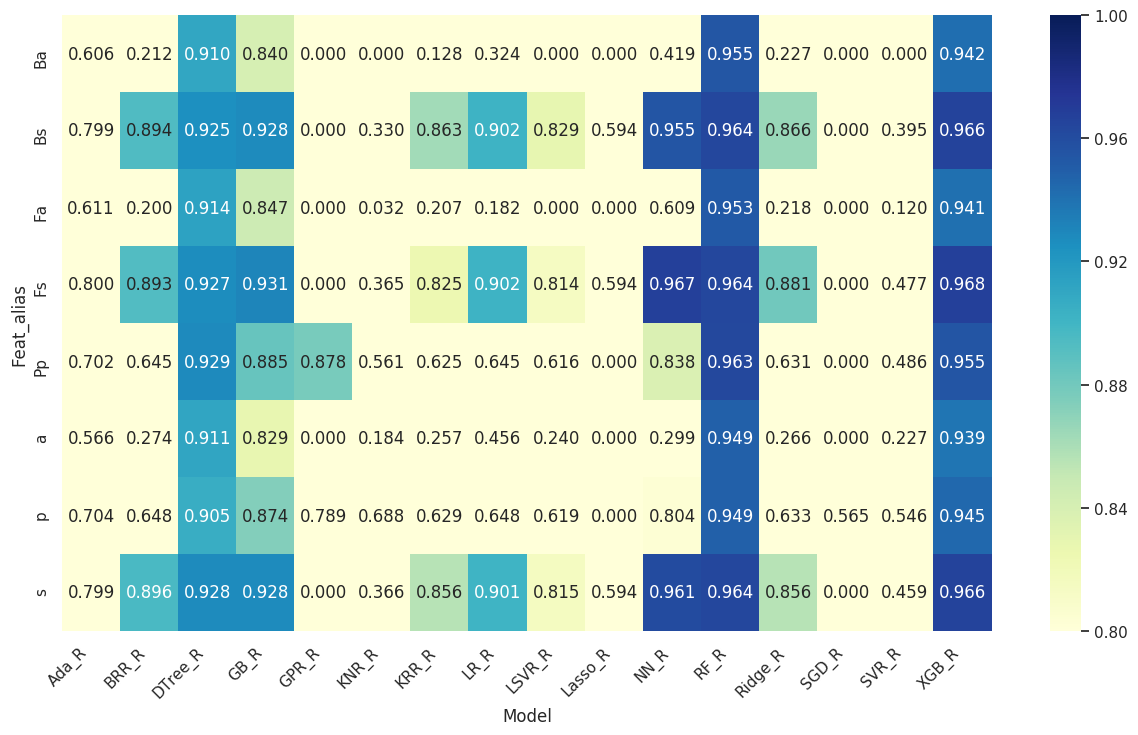

In [113]:
gb_data = reg_res_df[reg_res_df['R2']>0].groupby(by=[
            'Feat_alias', 'Model'])['R2'].mean().unstack()
gb_data.replace(np.nan, 0, inplace=True)
df_2heatmap(gb_data)

In [272]:
df = reg_res_df.copy()
df['Global'] = df['Feat_alias'].apply(lambda x: FSet.alias_dict_inverse[x[0]] if len(x)==2 else '--')
df['Local'] = df['Feat_alias'].apply(lambda x: FSet.alias_dict_inverse[x[-1]])
df['Model'] = df['Model'].apply(lambda x: x[:-2])
df['sel'] = df['Model'].apply(lambda x: 0 if x in ['SGD'] else 1) 
df

,Feat_idx,Feat_alias,Model,MAE,MSE,R2,F1_micro_5c,F1_micro_3c,Global,Local,sel
700,7,Fs,XGB,4.913000e-01,4.444000e-01,9.677000e-01,0.8304,0.9109,mergefp,SOAP,1
715,7,Fs,NN,4.911000e-01,4.477000e-01,9.674000e-01,0.8210,0.9031,mergefp,SOAP,1
1400,14,Bs,XGB,5.031000e-01,4.625000e-01,9.664000e-01,0.8334,0.9112,BoB,SOAP,1
0,0,s,XGB,5.027000e-01,4.628000e-01,9.663000e-01,0.8326,0.9133,--,SOAP,1
1,0,s,RF,5.049000e-01,5.002000e-01,9.636000e-01,0.8274,0.9043,--,SOAP,1
701,7,Fs,RF,5.051000e-01,5.002000e-01,9.636000e-01,0.8285,0.9052,mergefp,SOAP,1
1401,14,Bs,RF,5.041000e-01,4.998000e-01,9.636000e-01,0.8276,0.9052,BoB,SOAP,1
2301,23,Pp,RF,5.062000e-01,5.057000e-01,9.632000e-01,0.8308,0.9093,PhyChem_total,PhyChem_local,1
15,0,s,NN,5.426000e-01,5.334000e-01,9.612000e-01,0.8057,0.8941,--,SOAP,1
1415,14,Bs,NN,5.843000e-01,6.175000e-01,9.551000e-01,0.7966,0.8903,BoB,SOAP,1


In [273]:
gb_data2 = df[(df['R2']>0) & (df['sel']==1)].groupby(by=[
            'Local', 'Global', 'Model'])['R2'].mean().unstack()
gb_data2.replace(np.nan, 0, inplace=True)
colors_ = sns.color_palette("YlGnBu",135).as_hex()[:90]+sns.color_palette("YlGnBu",30).as_hex()[-10:]
color_map = ListedColormap(colors_) #as_cmap=True)
aaa = gb_data2.style.background_gradient(cmap=color_map, axis=None, low=0.0, high=0.03, text_color_threshold=0.408)
aaa.format("{:.3f}")
aaa

In [486]:
aaa.to_excel('./DataSet/processed/Benchmark_pkl/styled2.xlsx', engine='openpyxl')

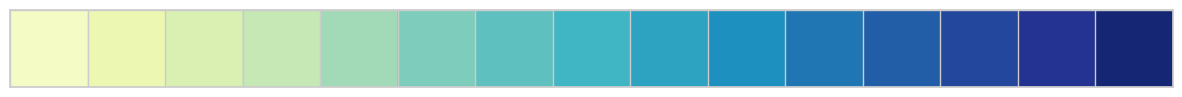

In [217]:
sns.palplot(sns.color_palette("YlGnBu",15))

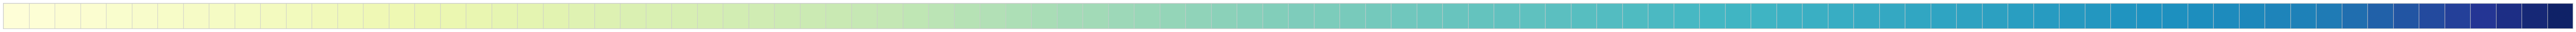

In [257]:
sns.palplot(sns.color_palette("YlGnBu",135)[:90]+sns.color_palette("YlGnBu",30)[-10:])